In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('AccData').getOrCreate()

In [3]:
all_data = spark.read.csv('accidents.csv', inferSchema = 'True', header = True)

In [4]:
all_data.printSchema()

root
 |-- Id: string (nullable = true)
 |-- District Name: string (nullable = true)
 |-- Neighborhood Name: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)



In [5]:
all_data.show()

+---------------+-------------+--------------------+--------------------+---------+---------+---+----+---------------+-------------+----------------+-------+-----------------+----------+-----------+
|             Id|District Name|   Neighborhood Name|              Street|  Weekday|    Month|Day|Hour|Part of the day|Mild injuries|Serious injuries|Victims|Vehicles involved| Longitude|   Latitude|
+---------------+-------------+--------------------+--------------------+---------+---------+---+----+---------------+-------------+----------------+-------+-----------------+----------+-----------+
|2017S008429    |      Unknown|             Unknown|Número 27        ...|   Friday|  October| 13|   8|        Morning|            2|               0|      2|                2|2.12562442|41.34004482|
|2017S007316    |      Unknown|             Unknown|Número 3 Zona Fra...|   Friday|September|  1|  13|        Morning|            2|               0|      2|                2|2.12045245|41.33942606|
|2017

In [6]:
all_data.crosstab("Serious injuries", "Vehicles involved").show()

+----------------------------------+---+----+---+---+---+---+----+---+---+---+---+---+---+---+
|Serious injuries_Vehicles involved|  0|   1| 10| 11| 13| 14|   2|  3|  4|  5|  6|  7|  8|  9|
+----------------------------------+---+----+---+---+---+---+----+---+---+---+---+---+---+---+
|                                 2|  0|   7|  0|  0|  1|  0|   6|  0|  1|  0|  0|  0|  0|  0|
|                                 4|  0|   0|  0|  0|  0|  0|   1|  0|  0|  0|  0|  0|  0|  0|
|                                 1|  0|  74|  0|  0|  0|  0| 113| 18|  0|  2|  0|  0|  0|  0|
|                                 0|  5|2179|  2|  1|  0|  1|6911|780|164| 46| 14|  6|  2|  5|
+----------------------------------+---+----+---+---+---+---+----+---+---+---+---+---+---+---+



In [7]:
all_data.count()

10339

In [8]:
all_data.fillna('null')

DataFrame[Id: string, District Name: string, Neighborhood Name: string, Street: string, Weekday: string, Month: string, Day: int, Hour: int, Part of the day: string, Mild injuries: int, Serious injuries: int, Victims: int, Vehicles involved: int, Longitude: double, Latitude: double]

In [9]:
all_data.printSchema()

root
 |-- Id: string (nullable = true)
 |-- District Name: string (nullable = true)
 |-- Neighborhood Name: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)



In [10]:
data = all_data.drop('Id', 'Neighborhood Name', 'Street', 'Month')

In [11]:
data.printSchema()

root
 |-- District Name: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)



In [12]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [13]:
dIndexer = StringIndexer(inputCol = 'District Name', outputCol = 'DName_Index')

In [14]:
dIndxmodel = dIndexer.fit(data)

In [15]:
ddata = dIndxmodel.transform(data)

In [16]:
ddata.printSchema()

root
 |-- District Name: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- DName_Index: double (nullable = false)



In [17]:
windexer = StringIndexer(inputCol = 'Weekday', outputCol = 'W_Index')

In [18]:
wIndxmodel = windexer.fit(ddata)

In [19]:
wdata = wIndxmodel.transform(ddata)

In [20]:
wdata.printSchema()

root
 |-- District Name: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- DName_Index: double (nullable = false)
 |-- W_Index: double (nullable = false)



In [21]:
pdayindexer = StringIndexer(inputCol = 'Part of the day', outputCol = 'Pday_Index')

In [22]:
pdayIndxmodel = pdayindexer.fit(wdata)

In [23]:
pdata = pdayIndxmodel.transform(wdata)

In [24]:
pdata.printSchema()

root
 |-- District Name: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Part of the day: string (nullable = true)
 |-- Mild injuries: integer (nullable = true)
 |-- Serious injuries: integer (nullable = true)
 |-- Victims: integer (nullable = true)
 |-- Vehicles involved: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- DName_Index: double (nullable = false)
 |-- W_Index: double (nullable = false)
 |-- Pday_Index: double (nullable = false)



In [25]:
pdata.select('Weekday', 'W_Index').show()

+---------+-------+
|  Weekday|W_Index|
+---------+-------+
|   Friday|    0.0|
|   Friday|    0.0|
|   Friday|    0.0|
|   Friday|    0.0|
| Thursday|    2.0|
|Wednesday|    3.0|
| Saturday|    5.0|
|  Tuesday|    1.0|
|   Monday|    4.0|
|Wednesday|    3.0|
| Thursday|    2.0|
|Wednesday|    3.0|
|   Friday|    0.0|
|   Monday|    4.0|
| Saturday|    5.0|
|   Monday|    4.0|
| Saturday|    5.0|
| Thursday|    2.0|
|   Monday|    4.0|
|   Friday|    0.0|
+---------+-------+
only showing top 20 rows



In [26]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [27]:
pdata.columns

['District Name',
 'Weekday',
 'Day',
 'Hour',
 'Part of the day',
 'Mild injuries',
 'Serious injuries',
 'Victims',
 'Vehicles involved',
 'Longitude',
 'Latitude',
 'DName_Index',
 'W_Index',
 'Pday_Index']

In [28]:
assembler = VectorAssembler(
    inputCols=["W_Index", "Day", "Hour", "Latitude", "Longitude", "Pday_Index", "Vehicles involved", "DName_Index"],
    outputCol="features")

In [29]:
output = assembler.transform(pdata)

In [30]:
output.show()

+-------------+---------+---+----+---------------+-------------+----------------+-------+-----------------+----------+-----------+-----------+-------+----------+--------------------+
|District Name|  Weekday|Day|Hour|Part of the day|Mild injuries|Serious injuries|Victims|Vehicles involved| Longitude|   Latitude|DName_Index|W_Index|Pday_Index|            features|
+-------------+---------+---+----+---------------+-------------+----------------+-------+-----------------+----------+-----------+-----------+-------+----------+--------------------+
|      Unknown|   Friday| 13|   8|        Morning|            2|               0|      2|                2|2.12562442|41.34004482|       10.0|    0.0|       1.0|[0.0,13.0,8.0,41....|
|      Unknown|   Friday|  1|  13|        Morning|            2|               0|      2|                2|2.12045245|41.33942606|       10.0|    0.0|       1.0|[0.0,1.0,13.0,41....|
|      Unknown|   Friday|  8|  21|      Afternoon|            5|               0|    

In [31]:
final_data = output.select('features', 'Victims')

In [32]:
train_data, test_data = final_data.randomSplit([0.7, 0.3])

In [33]:
train_data.describe().show()

+-------+------------------+
|summary|           Victims|
+-------+------------------+
|  count|              7230|
|   mean|1.1832641770401107|
| stddev|0.7269466085052957|
|    min|                 0|
|    max|                10|
+-------+------------------+



In [34]:
test_data.describe().show()

+-------+-----------------+
|summary|          Victims|
+-------+-----------------+
|  count|             3109|
|   mean|1.167899646188485|
| stddev| 0.75387381908355|
|    min|                0|
|    max|               10|
+-------+-----------------+



In [35]:
from pyspark.ml.regression import LinearRegression

In [36]:
lr = LinearRegression(labelCol='Victims')

In [37]:
lrModel = lr.fit(train_data)

In [38]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.01049047493177089,0.0006768812700867145,0.005694859275880859,0.6079377651890264,-0.2059866489227173,0.0057409327869022385,0.17223071366043902,-0.001005185380628608] Intercept: -23.988992395248918


In [39]:
test_results = lrModel.evaluate(test_data)

In [40]:
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-0.11394497239271928|
|-0.12780201464620333|
|-0.12797539610006936|
| -0.1357970127671564|
|-0.14006741365031417|
|  0.8440536511458916|
|-0.15957323496257914|
|  0.8791184383529504|
|0.008918968160497087|
|  0.8387111020767826|
|   1.822303576356564|
|  0.8258145063886637|
| -0.1662557814016985|
|  1.0056548983752833|
|-0.17928403669360193|
|-0.17429920665360754|
| -0.1855931202616965|
|-0.21564895617880353|
|  0.7792372401819812|
|  1.7997032347068114|
+--------------------+
only showing top 20 rows



In [41]:
unlabeled_data = test_data.select('features')

In [42]:
predictions = lrModel.transform(unlabeled_data)

In [43]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[0.0,1.0,8.0,41.3...|1.1139449723927193|
|[0.0,1.0,8.0,41.4...|1.1278020146462033|
|[0.0,1.0,9.0,41.3...|1.1279753961000694|
|[0.0,1.0,10.0,41....|1.1357970127671564|
|[0.0,1.0,10.0,41....|1.1400674136503142|
|[0.0,1.0,11.0,41....|1.1559463488541084|
|[0.0,1.0,11.0,41....|1.1595732349625791|
|[0.0,1.0,13.0,41....|1.1208815616470496|
|[0.0,1.0,13.0,41....|0.9910810318395029|
|[0.0,1.0,13.0,41....|1.1612888979232174|
|[0.0,1.0,13.0,41....| 1.177696423643436|
|[0.0,1.0,17.0,41....|1.1741854936113363|
|[0.0,1.0,18.0,41....|1.1662557814016985|
|[0.0,1.0,18.0,41....|0.9943451016247167|
|[0.0,1.0,19.0,41....| 1.179284036693602|
|[0.0,1.0,19.0,41....|1.1742992066536075|
|[0.0,1.0,21.0,41....|1.1855931202616965|
|[0.0,1.0,22.0,41....|1.2156489561788035|
|[0.0,1.0,22.0,41....|1.2207627598180188|
|[0.0,1.0,23.0,41....|1.2002967652931886|
+--------------------+------------

In [44]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))
print('R2:{}'.format(test_results.r2))

RMSE: 0.7461745204550325
MSE: 0.5567764149762978
R2:0.02000644424568243


In [45]:
fdata = lrModel.transform(test_data)

In [46]:
fdata.show()

+--------------------+-------+------------------+
|            features|Victims|        prediction|
+--------------------+-------+------------------+
|[0.0,1.0,8.0,41.3...|      1|1.1139449723927193|
|[0.0,1.0,8.0,41.4...|      1|1.1278020146462033|
|[0.0,1.0,9.0,41.3...|      1|1.1279753961000694|
|[0.0,1.0,10.0,41....|      1|1.1357970127671564|
|[0.0,1.0,10.0,41....|      1|1.1400674136503142|
|[0.0,1.0,11.0,41....|      2|1.1559463488541084|
|[0.0,1.0,11.0,41....|      1|1.1595732349625791|
|[0.0,1.0,13.0,41....|      2|1.1208815616470496|
|[0.0,1.0,13.0,41....|      1|0.9910810318395029|
|[0.0,1.0,13.0,41....|      2|1.1612888979232174|
|[0.0,1.0,13.0,41....|      3| 1.177696423643436|
|[0.0,1.0,17.0,41....|      2|1.1741854936113363|
|[0.0,1.0,18.0,41....|      1|1.1662557814016985|
|[0.0,1.0,18.0,41....|      2|0.9943451016247167|
|[0.0,1.0,19.0,41....|      1| 1.179284036693602|
|[0.0,1.0,19.0,41....|      1|1.1742992066536075|
|[0.0,1.0,21.0,41....|      1|1.1855931202616965|


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
fdata.describe().show()

+-------+-----------------+------------------+
|summary|          Victims|        prediction|
+-------+-----------------+------------------+
|  count|             3109|              3109|
|   mean|1.167899646188485|1.1793393400912686|
| stddev| 0.75387381908355|0.1277375459177813|
|    min|                0|0.8331459270212243|
|    max|               10| 2.745132622188148|
+-------+-----------------+------------------+



In [49]:
fdata.summary()

DataFrame[summary: string, Victims: string, prediction: string]

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [51]:
from pyspark.sql.functions import corr

In [52]:
df1 = fdata.toPandas()

In [53]:
df1.head()

,features,Victims,prediction
0,"[0.0, 1.0, 8.0, 41.386697, 2.174926, 1.0, 2.0,...",1,1.113945
1,"[0.0, 1.0, 8.0, 41.411499, 2.205253, 1.0, 2.0,...",1,1.127802
2,"[0.0, 1.0, 9.0, 41.387244, 2.165353, 1.0, 2.0,...",1,1.127975
3,"[0.0, 1.0, 10.0, 41.386489, 2.1528, 1.0, 2.0, ...",1,1.135797
4,"[0.0, 1.0, 10.0, 41.394475, 2.155638, 1.0, 2.0...",1,1.140067


In [54]:
#Find which weekday had maximum Victims
df1.iloc[[df1['Victims'].idxmax()]]

,features,Victims,prediction
2811,"[5.0, 30.0, 13.0, 41.440756, 2.190726, 1.0, 2....",10,1.243106


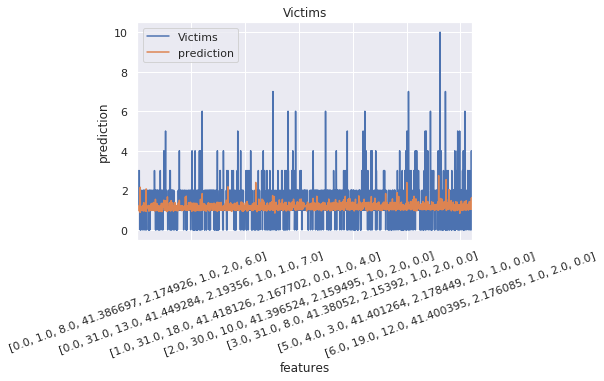

In [65]:
#Plot data using bar chart
df = df1.drop('prediction', axis=1)
ax = df1.plot(x = 'features', kind = 'line')
plt.xticks(rotation=20)
plt.xlabel('features')
plt.ylabel('prediction')
plt.title('Victims')
plt.savefig('Safe_Districts.png')
plt.show()

In [56]:
df = pdata.toPandas()

In [57]:
df.head()

,District Name,Weekday,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,DName_Index,W_Index,Pday_Index
0,Unknown,Friday,13,8,Morning,2,0,2,2,2.125624,41.340045,10.0,0.0,1.0
1,Unknown,Friday,1,13,Morning,2,0,2,2,2.120452,41.339426,10.0,0.0,1.0
2,Unknown,Friday,8,21,Afternoon,5,0,5,2,2.167356,41.360886,10.0,0.0,0.0
3,Unknown,Friday,21,2,Night,1,0,1,2,2.124529,41.337668,10.0,0.0,2.0
4,Sant Martí,Thursday,25,14,Afternoon,1,0,1,3,2.185272,41.416365,1.0,2.0,0.0


In [58]:
pltdata = pdata.select('District Name', 'Victims', 'Vehicles involved')

In [59]:
pltdf = pltdata.toPandas()

In [60]:
pltdf.head()

,District Name,Victims,Vehicles involved
0,Unknown,2,2
1,Unknown,2,2
2,Unknown,5,2
3,Unknown,1,2
4,Sant Martí,1,3


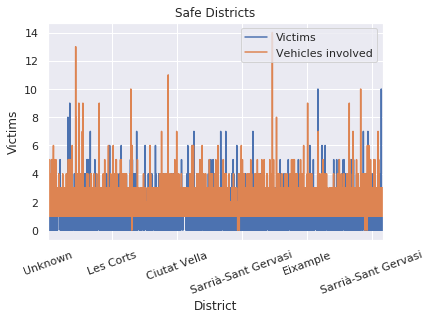

In [61]:
#Plot data using bar chart
df2 = pltdf.drop('Victims', axis=1)
ax = pltdf.plot(x = 'District Name', kind = 'line')
plt.xticks(rotation=20)
plt.xlabel('District')
plt.ylabel('Victims')
plt.title('Safe Districts')
plt.savefig('Safe_Districts.png')
plt.show()